In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


In [6]:
# Set the path to the train and test directories
train_data_dir = 'D:/data_split/train'
test_data_dir = 'D:/data_split/test'

# Set the number of classes and image dimensions
num_classes = 13
image_size = (96, 96)
batch_size = 8
class_names = [
    'Andorra_2019',
    'Common',
    'Lithuania_2021',
    'Monaco_2015',
    'Monaco_2016',
    'Monaco_2017',
    'Monaco_2018',
    'Monaco_2019',
    'SanMarino_2004',
    'SanMarino_2005',
    'Vatican_2004',
    'Vatican_2005',
    'Vatican_2006'
]


# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Normalization for testing/validation
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for loading the train and test images
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    classes = class_names,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    seed=42,
    shuffle=True
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    classes = class_names,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    seed=42,
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    classes = class_names,
    batch_size=batch_size,
    class_mode='categorical',
    #seed=42,
    shuffle=False
)



Found 5150 images belonging to 13 classes.
Found 1283 images belonging to 13 classes.
Found 724 images belonging to 13 classes.


In [7]:
# Load the pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))

# Freeze the weights of the pre-trained layers so they are not updated during training
for layer in base_model.layers:
    layer.trainable = False

# Build the improved CNN model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1179904   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 13)                3341      
                                                                 
Total params: 15,897,933
Trainable params: 1,183,245
Non-trainable params: 14,714,688
_________________________________________________________________


In [11]:
# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Set the number of training and validation steps per epoch
train_steps_per_epoch = train_generator.n // train_generator.batch_size
validation_steps_per_epoch = validation_generator.n // validation_generator.batch_size

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=50,  # Adjust the number of epochs as needed
    validation_data=validation_generator,
    validation_steps=validation_steps_per_epoch
)

# Evaluate the model on the test dataset
test_steps_per_epoch = test_generator.n // test_generator.batch_size
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps_per_epoch)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
643/643 [==============================] - 280s 435ms/step - loss: 0.2038 - accuracy: 0.9284 - val_loss: 0.5575 - val_accuracy: 0.8672
Epoch 2/50
643/643 [==============================] - 280s 436ms/step - loss: 0.2345 - accuracy: 0.9129 - val_loss: 0.6425 - val_accuracy: 0.8602
Epoch 3/50
643/643 [==============================] - 279s 434ms/step - loss: 0.2148 - accuracy: 0.9210 - val_loss: 0.6820 - val_accuracy: 0.8586
Epoch 4/50
643/643 [==============================] - 278s 432ms/step - loss: 0.2209 - accuracy: 0.9205 - val_loss: 0.6221 - val_accuracy: 0.8703
Epoch 5/50
643/643 [==============================] - 279s 434ms/step - loss: 0.1843 - accuracy: 0.9315 - val_loss: 0.6880 - val_accuracy: 0.8484
Epoch 6/50
643/643 [==============================] - 279s 434ms/step - loss: 0.1905 - accuracy: 0.9313 - val_loss: 0.5574 - val_accuracy: 0.8719
Epoch 7/50
643/643 [==============================] - 271s 422ms/step - loss: 0.1904 - accuracy: 0.9306 - val_loss: 0.6286 -

## Plot training/validation loss and accuracy using matplotlib

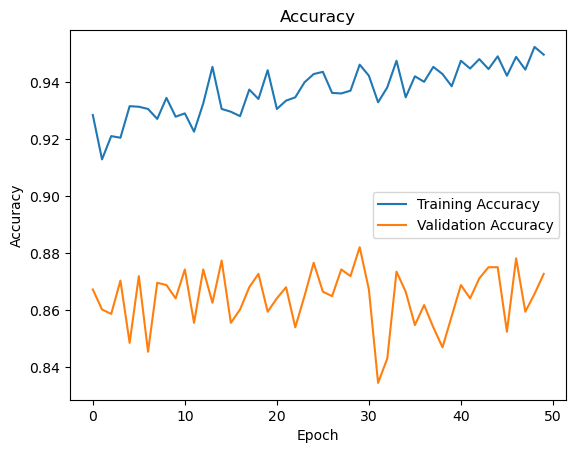

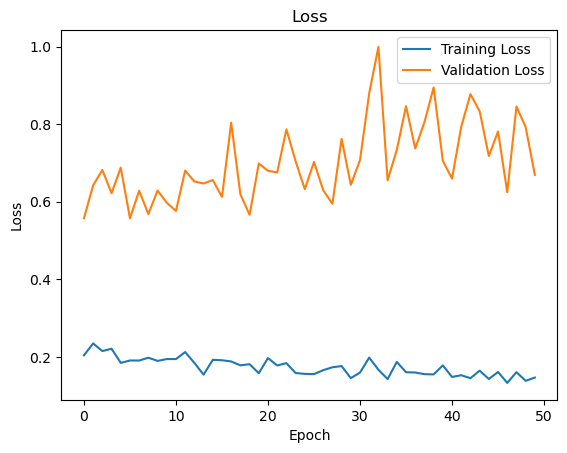

In [12]:
# Get the accuracy and loss history from the training
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
# Get the accuracy and loss history from the training

## Plot accuracy and loss of the test dataset using matplotlib

90/90 [==============================] - 32s 358ms/step - loss: 0.3112 - accuracy: 0.9444
Test Loss: 0.3112318217754364
Test Accuracy: 0.9444444179534912


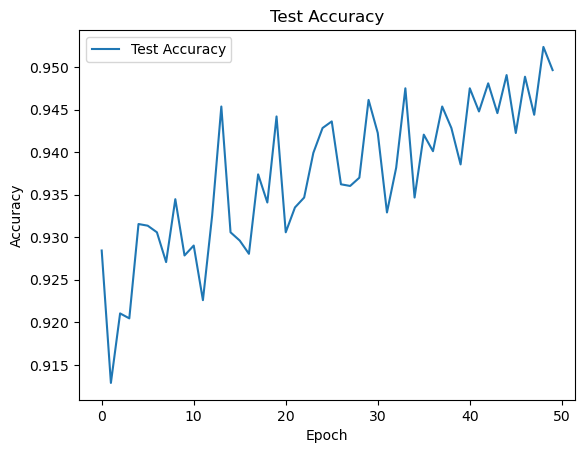

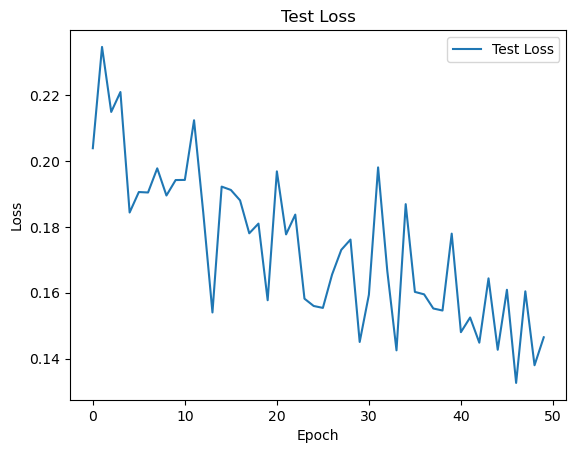

In [16]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps_per_epoch)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Get the accuracy and loss history from the training
test_acc = history.history['accuracy']
test_loss = history.history['loss']

# Plot accuracy
plt.plot(test_acc, label='Test Accuracy')
plt.title('Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(test_loss, label='Test Loss')
plt.title('Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Plot the confusion matrix on the test set

91/91 [==============================] - 37s 405ms/step


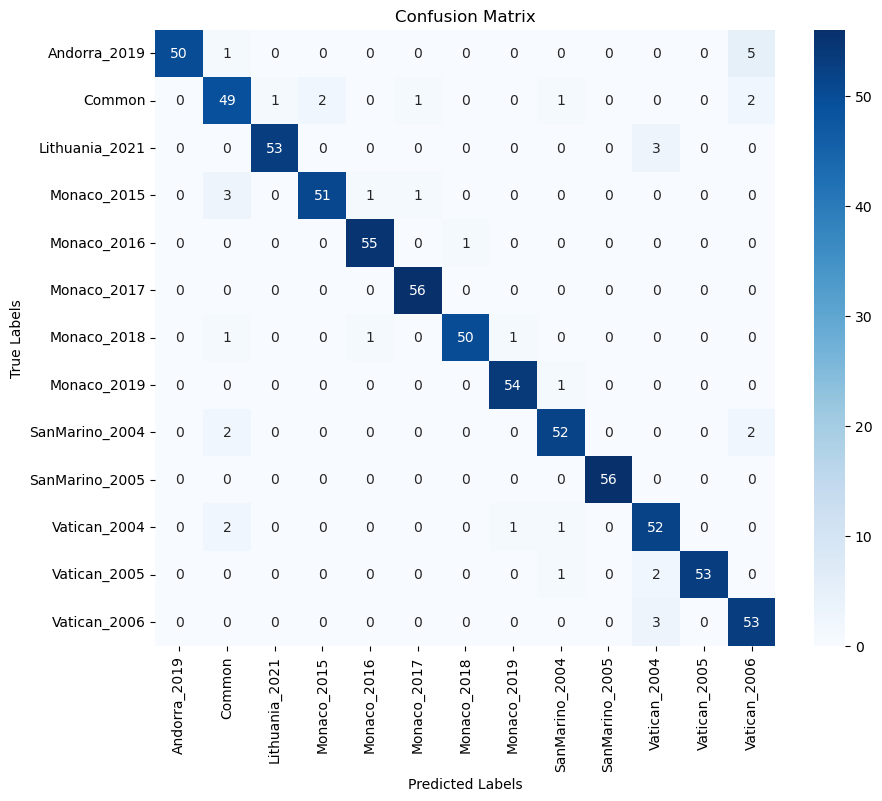

In [17]:
# Get the true labels for the test set
test_true_labels = test_generator.classes

# Predict the labels for the test set
test_pred_probs = model.predict(test_generator)
test_pred_labels = np.argmax(test_pred_probs, axis=1)

# Generate the confusion matrix
cm = confusion_matrix(test_true_labels, test_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=test_generator.class_indices, yticklabels=test_generator.class_indices)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [33]:
#saving model
model.save('C:/Users/spoor/Documents/Jupyter-works/vgg16_model/vgg16_model.h5')

model.save_weights('C:/Users/spoor/Documents/Jupyter-works/vgg16_model/vgg16_weights.h5')

In [34]:
#extracting saved model
model = tf.keras.models.load_model('C:/Users/spoor/Documents/Jupyter-works/vgg16_model/vgg16_model.h5')
model.load_weights('C:/Users/spoor/Documents/Jupyter-works/vgg16_model/vgg16_weights.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 4608)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               1179904   
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 13)                3341      
                                                                 
Total params: 15,897,933
Trainable params: 1,183,245
Non-trainable params: 14,714,688
_________________________________________________________________


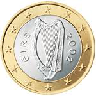

In [35]:
img = tf.keras.preprocessing.image.load_img('D:/common-test.jpg', target_size=(96, 96))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

In [36]:
# generate predictions for samples
predictions = model.predict(img_array)
print(predictions)

1/1 [==============================] - 2s 2s/step
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [37]:
# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

[1]


In [38]:
# transform classes number into classes name
class_names[class_id.item()]


'Common'

In [5]:
img = tf.keras.preprocessing.image.load_img('D:/8.jpg', target_size=(96, 96))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = np.array([img_array]) 
img

predictions = model.predict(img_array)
print(predictions)

# generate argmax for predictions
class_id = np.argmax(predictions, axis = 1)
print(class_id)

# transform classes number into classes name
class_names[class_id.item()]

NameError: name 'model' is not defined